In [58]:
# for data
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
# for model
import sklearn 
from sklearn.linear_model import ridge_regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
from sklearn.svm import SVR # https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# for vizualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# load datas

In [4]:
X_data = pd.read_csv('train_data.csv')
y_data = pd.read_csv('test_data.csv')

# summarize dataset

In [5]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())

print_summarize_dataset(X_data)

Dataset dimension:
(20000, 12)
First 10 rows of dataset:
   id    airline   flight source_city departure_time stops arrival_time  \
0   1    Vistara   UK-810   Bangalore  Early_Morning   one        Night   
1   2   SpiceJet  SG-5094   Hyderabad        Evening  zero        Night   
2   3    Vistara   UK-846   Bangalore        Morning   one      Evening   
3   4    Vistara   UK-706     Kolkata        Morning   one      Evening   
4   5     Indigo  6E-5394     Chennai  Early_Morning  zero      Morning   
5   6  Air_India   AI-636       Delhi      Afternoon   one      Morning   
6   7    Vistara   UK-834     Chennai        Evening   one      Morning   
7   8  Air_India   AI-505   Bangalore        Morning  zero    Afternoon   
8   9    Vistara   UK-810   Bangalore  Early_Morning   one        Night   
9  10  Air_India   AI-538     Chennai          Night   one    Afternoon   

  destination_city     class  duration  days_left  price  
0           Mumbai   Economy     14.25         21   7212  

# is the data cleared?

In [6]:
X_data.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# let's change str data

In [7]:
X_data.head(3)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553


In [8]:
def change_str_in_data(X_data):
    print(set(X_data['destination_city']))
    print(X_data['stops'].duplicated().sum())
    X_data['stops'] = X_data['stops'].replace({'one':1, 'zero':0, 'two_or_more':2})
    X_data['class'] = X_data['class'].replace({'Business':1,'Economy':0})
    ordinal = OrdinalEncoder()
    X_destination_city = ordinal.fit_transform(X_data[['destination_city']])
    X_data['destination_city_number'] = pd.DataFrame(X_destination_city)
    X_arrival_time = ordinal.fit_transform(X_data[['arrival_time']])
    X_data['X_arrival_time'] = pd.DataFrame(X_arrival_time)
    # departure_time
    X_departure_time = ordinal.fit_transform(X_data[['departure_time']])
    X_data['departure_time_number'] = pd.DataFrame(X_departure_time)
    X_source_city = ordinal.fit_transform(X_data[['source_city']])
    X_data['source_city_number'] = pd.DataFrame(X_source_city)
    X_airline = ordinal.fit_transform(X_data[['airline']])
    X_data['airline_number'] = pd.DataFrame(X_airline)

    flight_list = []
    for i in X_data['flight']:
        flight_list.append(i[3:])
    
    X_data['flight_number'] = pd.DataFrame(np.array(flight_list))
    X_data['flight_number'] = X_data['flight_number'].astype(int)
    
    print(X_data.corrwith(X_data['price']))
    return X_data

X_data = change_str_in_data(X_data)

{'Kolkata', 'Chennai', 'Hyderabad', 'Mumbai', 'Bangalore', 'Delhi'}
19997
id                        -0.002443
stops                      0.121455
class                      0.937868
duration                   0.213158
days_left                 -0.102545
price                      1.000000
destination_city_number    0.008747
X_arrival_time             0.046801
departure_time_number      0.058520
source_city_number         0.013570
airline_number             0.241193
flight_number             -0.211956
dtype: float64


/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_19238/2813399081.py:26: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X_data.corrwith(X_data['price']))


In [9]:
X_data.head(5)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,destination_city_number,X_arrival_time,departure_time_number,source_city_number,airline_number,flight_number
0,1,Vistara,UK-810,Bangalore,Early_Morning,1,Night,Mumbai,0,14.25,21,7212,5.0,5.0,1.0,0.0,5.0,810
1,2,SpiceJet,SG-5094,Hyderabad,Evening,0,Night,Kolkata,0,1.75,7,5292,4.0,5.0,2.0,3.0,4.0,5094
2,3,Vistara,UK-846,Bangalore,Morning,1,Evening,Delhi,1,9.58,5,60553,2.0,2.0,4.0,0.0,5.0,846
3,4,Vistara,UK-706,Kolkata,Morning,1,Evening,Hyderabad,0,6.75,28,5760,3.0,2.0,4.0,4.0,5.0,706
4,5,Indigo,6E-5394,Chennai,Early_Morning,0,Morning,Mumbai,0,2.00,4,10712,5.0,4.0,1.0,1.0,3.0,5394


# let's data vizualization

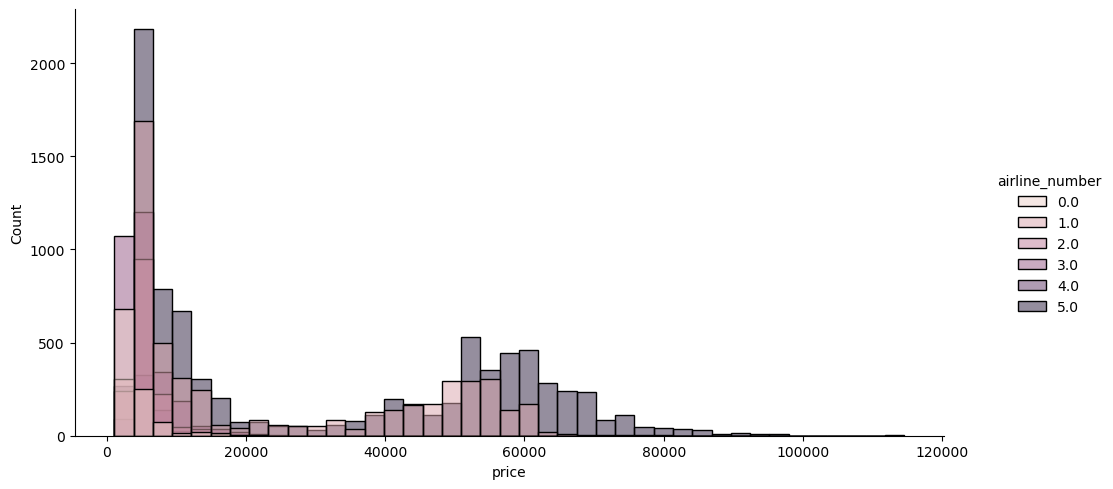

In [10]:
sns.displot(data=X_data, x='price',hue='airline_number', height=5, aspect=2)
plt.show()

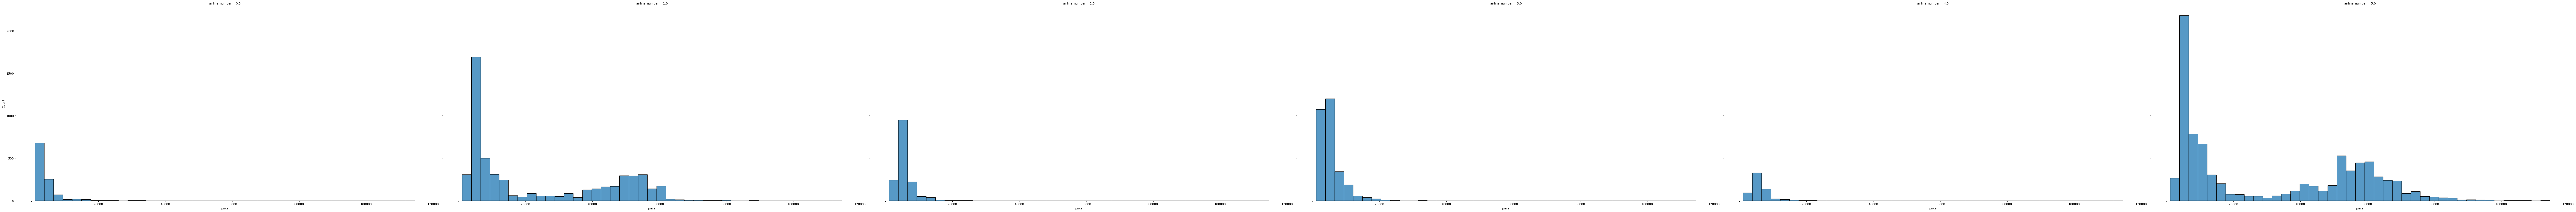

In [11]:
sns.displot(data=X_data, x='price',col='airline_number', height=10, aspect=2)# aspect height kopaytiramiz 2ga degani
plt.show()

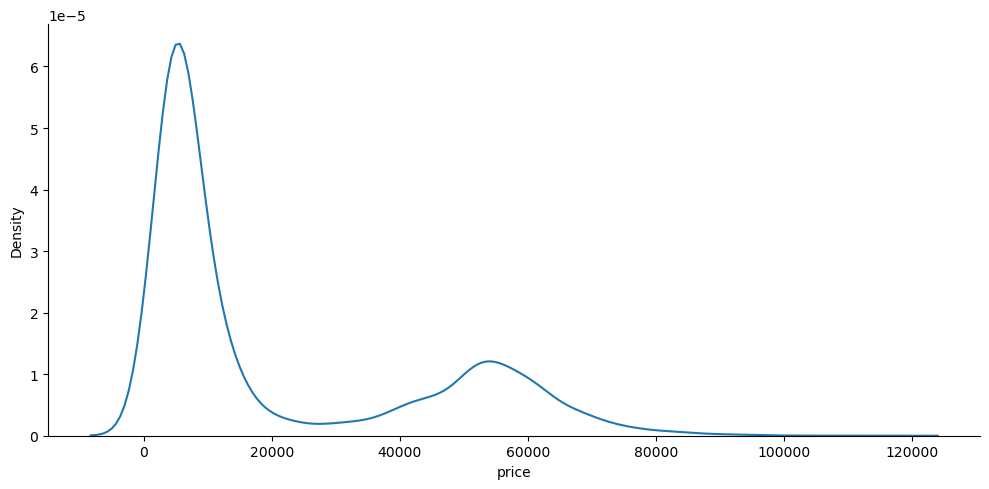

In [12]:
sns.displot(data=X_data, x='price', kind='kde', height=5, aspect=2)
plt.show()

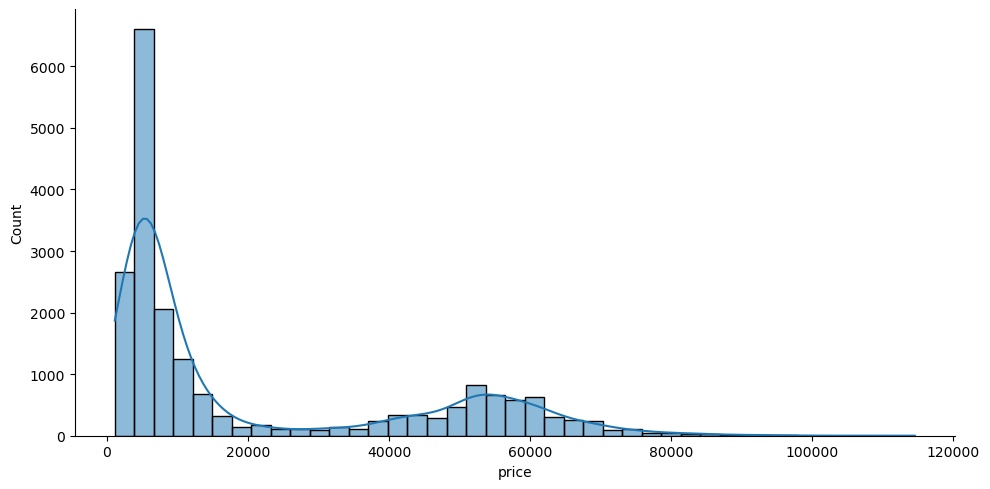

In [13]:
sns.displot(data=X_data, x='price', kde=True, height=5, aspect=2)
plt.show()

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_19238/2908523423.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X_data, x='price', hue='source_city',shade=True)


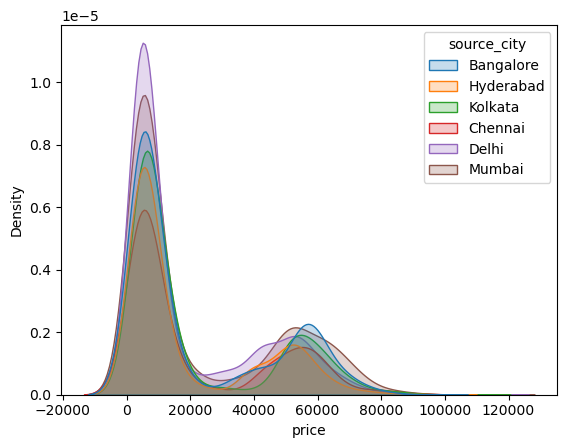

In [14]:
sns.kdeplot(data=X_data, x='price', hue='source_city',shade=True)
plt.show()

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_19238/3890566424.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X_data, x='price', hue='airline',shade=True)


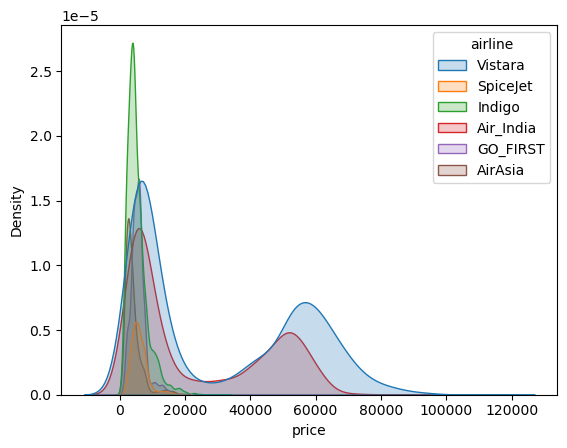

In [15]:
sns.kdeplot(data=X_data, x='price', hue='airline',shade=True)
plt.show()

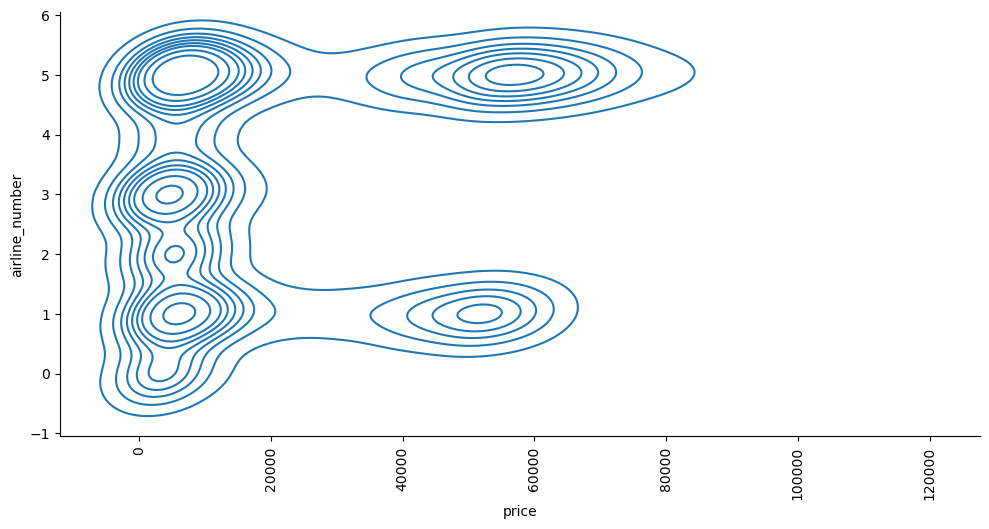

In [16]:
sns.displot(data=X_data, x='price',y='airline_number', kind='kde', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

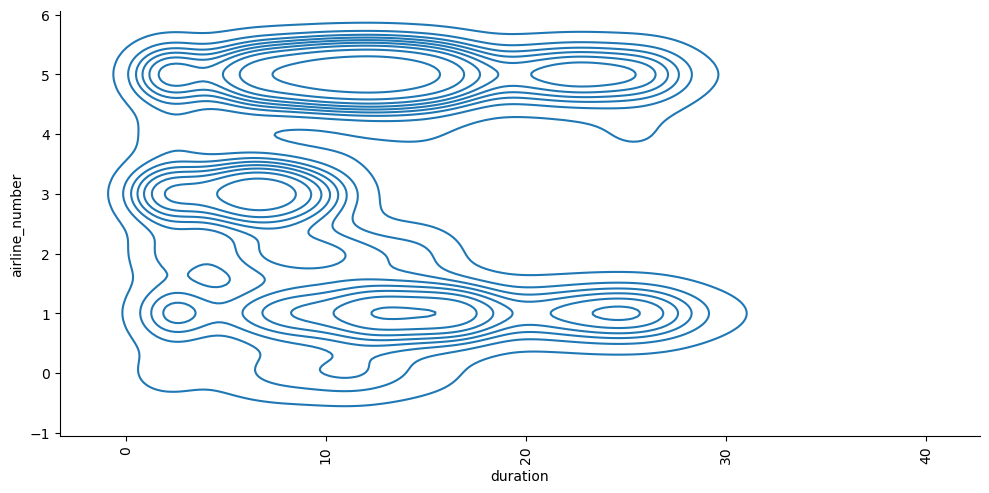

In [17]:
sns.displot(data=X_data, x='duration',y='airline_number', kind='kde', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

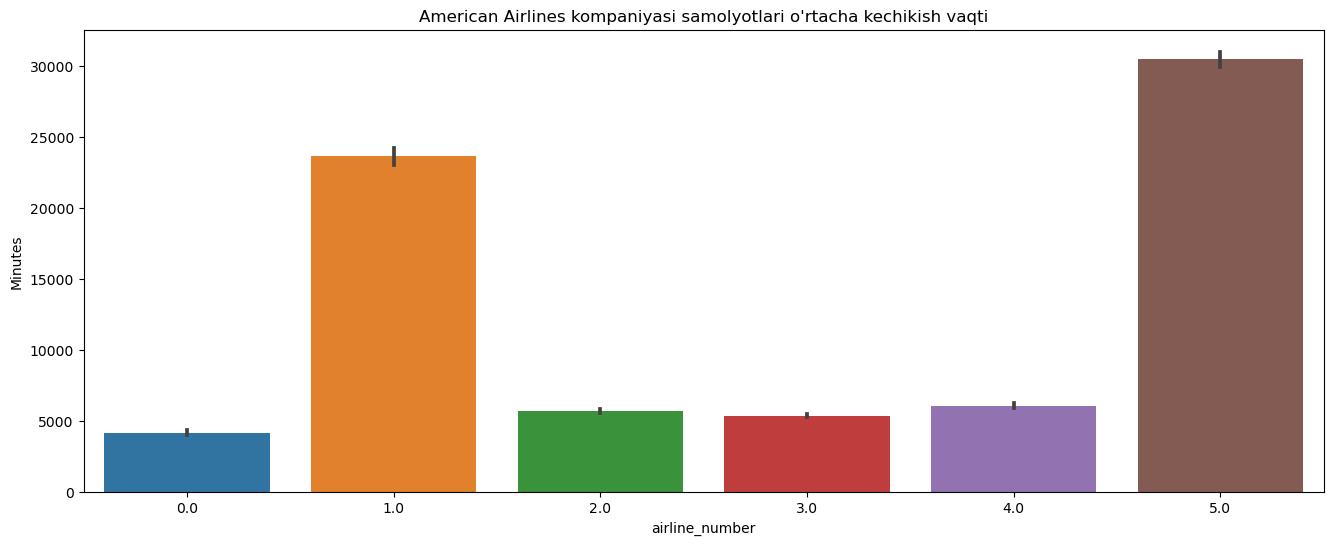

In [18]:
plt.figure(figsize=(16,6))
sns.barplot(x=X_data['airline_number'], y=X_data['price'])
plt.title("American Airlines kompaniyasi samolyotlari o'rtacha kechikish vaqti")
plt.ylabel("Minutes")
plt.show()

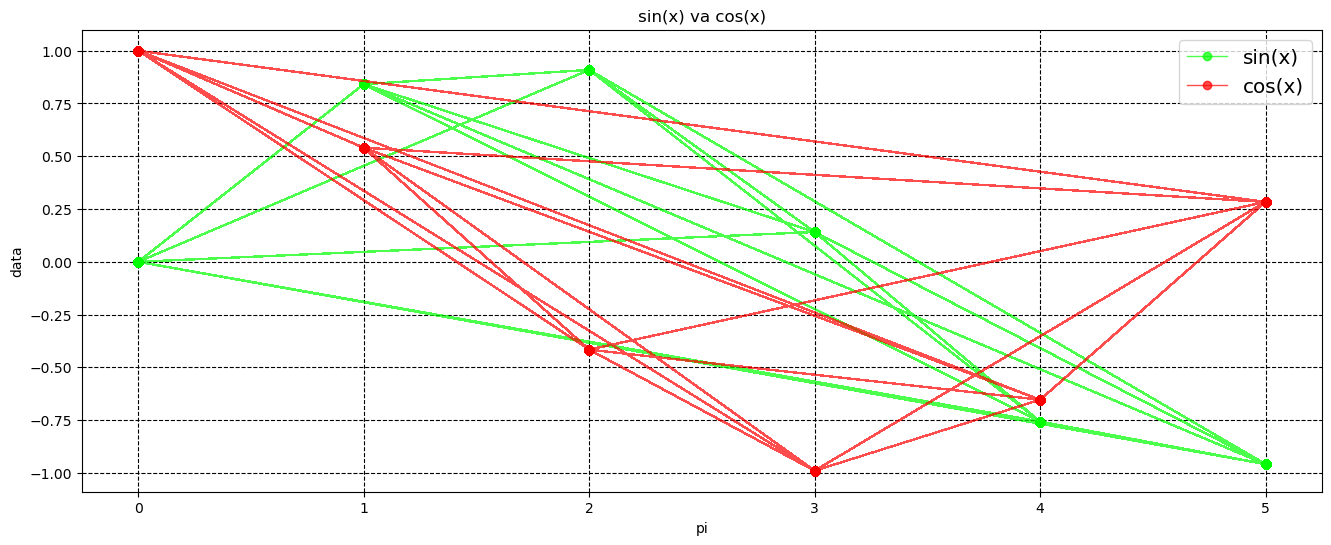

In [19]:
plt.figure(figsize=(16,6))# chizmaga olcham berish
x = X_data['airline_number']
sin = np.sin(x)
cos = np.cos(x)


plt.plot(x,sin,
        linewidth=1,
        linestyle="-",
        color="lime", 
        alpha=0.7,
        marker="o")

plt.plot(x, cos,
        linewidth=1,
        linestyle="-",
        color="red", 
        alpha=0.7,
        marker="o")

plt.title('sin(x) va cos(x)')
plt.legend(['sin(x)','cos(x)'], loc=0, fontsize='x-large')
plt.xlabel("pi")# x uqga label quyish
plt.ylabel('data')# y uqga label quysih
plt.grid(color='k', linestyle='--')# chziq chizib beradi
plt.savefig('vizual.jpg')
plt.show()

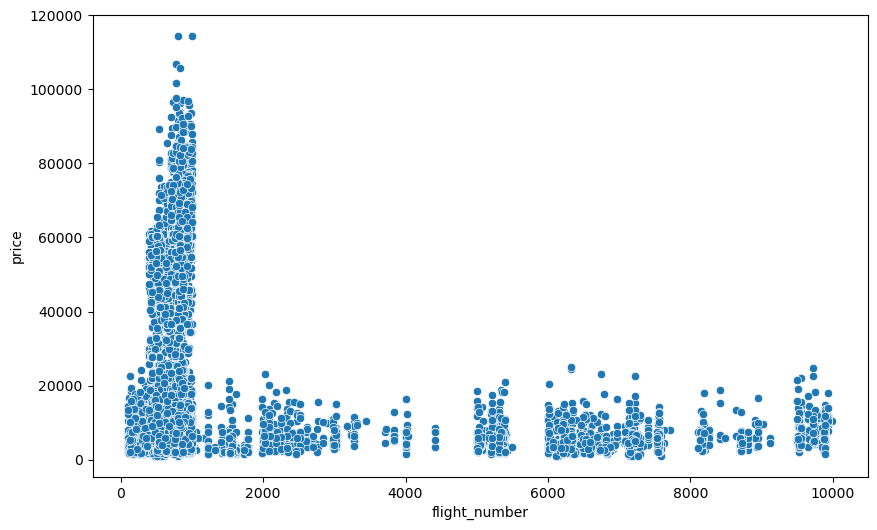

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_data, x='flight_number', y='price')
plt.show()

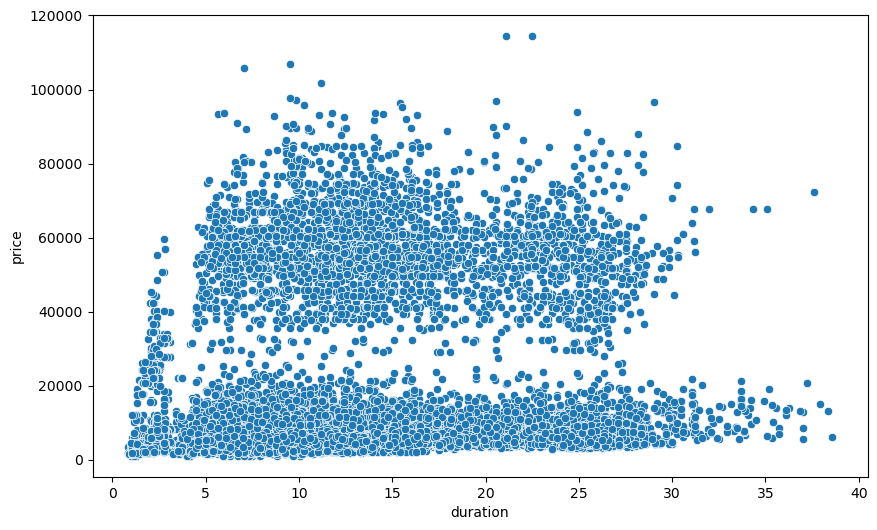

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_data, x='duration', y='price')
plt.show()

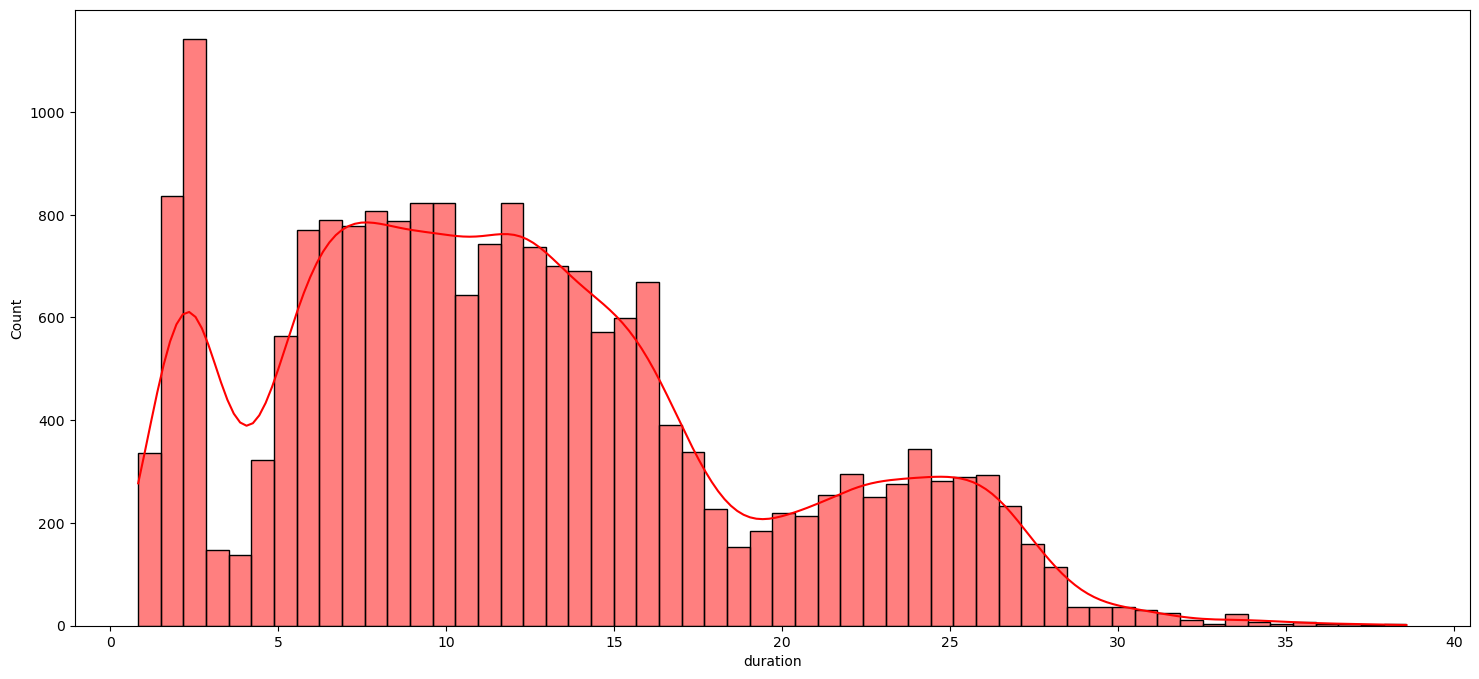

In [22]:
plt.figure(figsize = (18, 8))
sns.histplot(data=X_data, x="duration", kde=True, color= "red")
plt.show()

In [25]:
X_data.head(3)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,destination_city_number,X_arrival_time,departure_time_number,source_city_number,airline_number,flight_number
0,1,Vistara,UK-810,Bangalore,Early_Morning,1,Night,Mumbai,0,14.25,21,7212,5.0,5.0,1.0,0.0,5.0,810
1,2,SpiceJet,SG-5094,Hyderabad,Evening,0,Night,Kolkata,0,1.75,7,5292,4.0,5.0,2.0,3.0,4.0,5094
2,3,Vistara,UK-846,Bangalore,Morning,1,Evening,Delhi,1,9.58,5,60553,2.0,2.0,4.0,0.0,5.0,846


In [28]:
set(X_data['class'])

{0, 1}

In [38]:
X_data.head(3)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,destination_city_number,X_arrival_time,departure_time_number,source_city_number,airline_number,flight_number
0,1,Vistara,UK-810,Bangalore,Early_Morning,1,Night,Mumbai,0,14.25,21,7212,5.0,5.0,1.0,0.0,5.0,810
1,2,SpiceJet,SG-5094,Hyderabad,Evening,0,Night,Kolkata,0,1.75,7,5292,4.0,5.0,2.0,3.0,4.0,5094
2,3,Vistara,UK-846,Bangalore,Morning,1,Evening,Delhi,1,9.58,5,60553,2.0,2.0,4.0,0.0,5.0,846


<Axes: xlabel='airline_number', ylabel='count'>

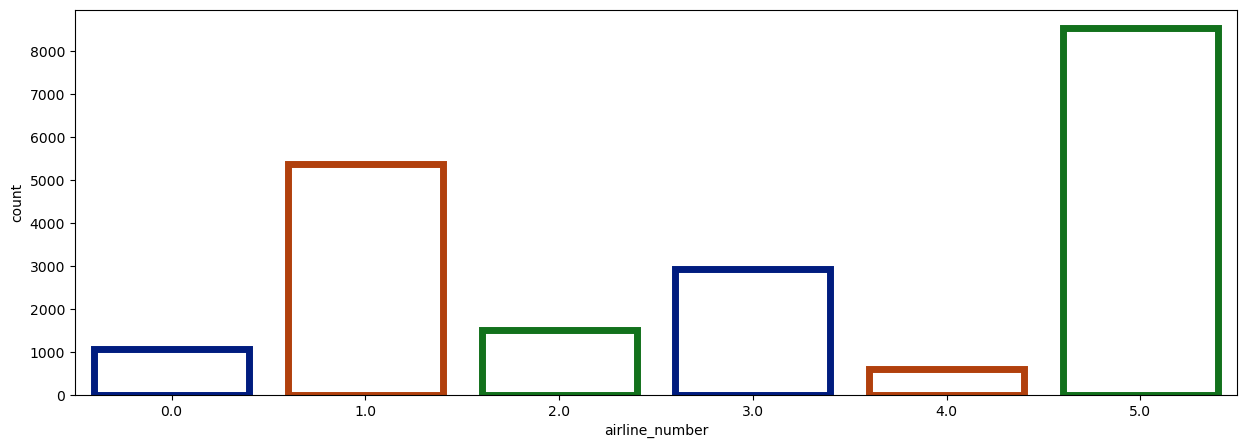

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(x='airline_number', data=X_data, facecolor=(1, 0, 1, 0), linewidth=5, edgecolor=sns.color_palette('dark', 3))

<Axes: xlabel='airline_number', ylabel='price'>

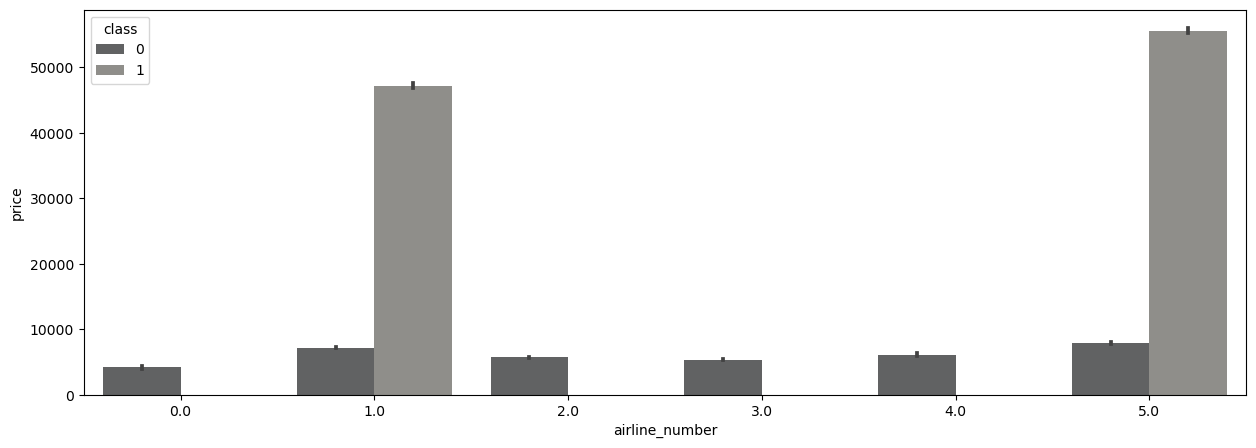

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(x='airline_number', y='price', hue='class', data=X_data, palette='cividis', saturation=.1)

<Axes: xlabel='days_left', ylabel='airline_number'>

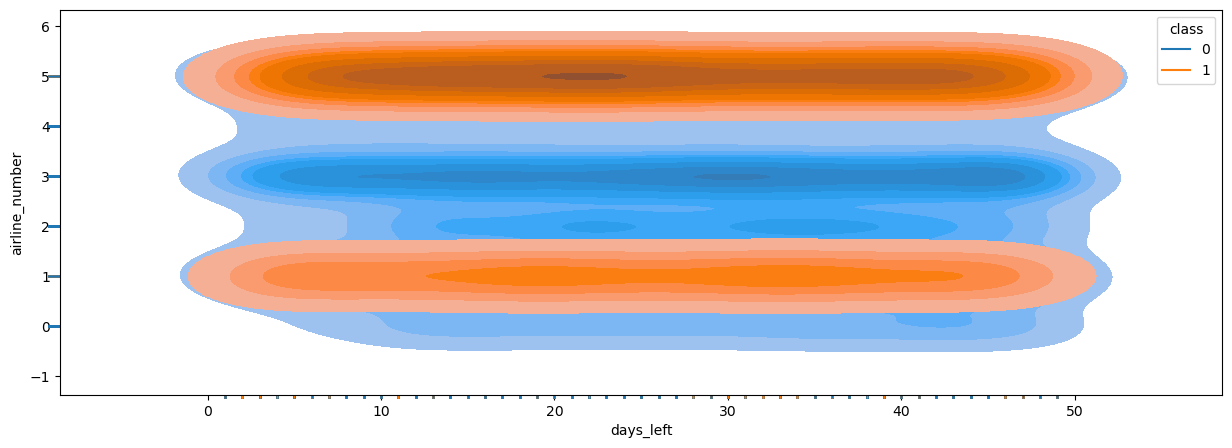

In [50]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=X_data, x='days_left', y='airline_number', hue='class', fill=True)
sns.rugplot(data=X_data, x='days_left', y='airline_number', hue='class', height=-.01, clip_on=False)

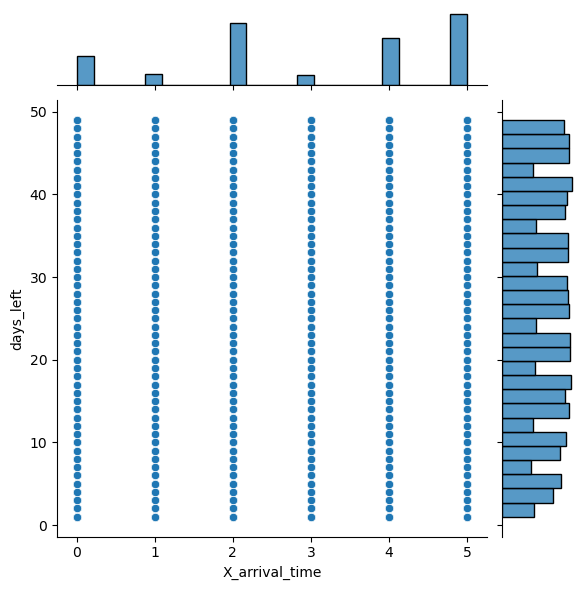

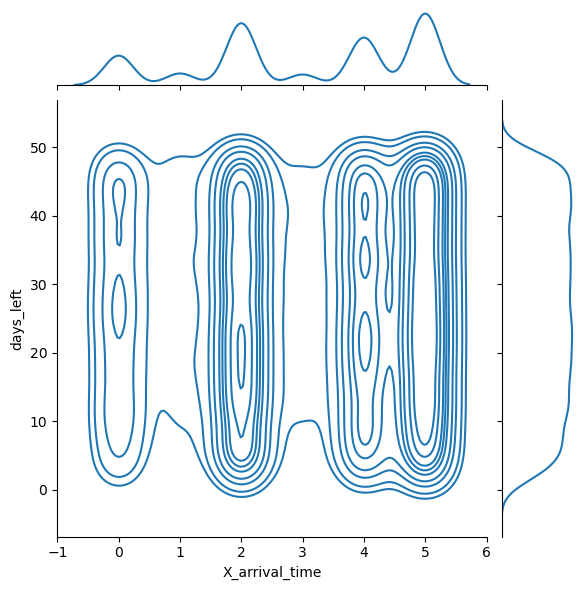

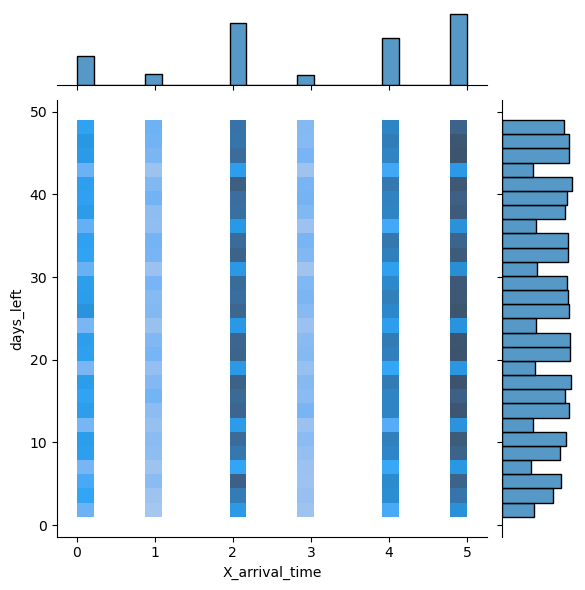

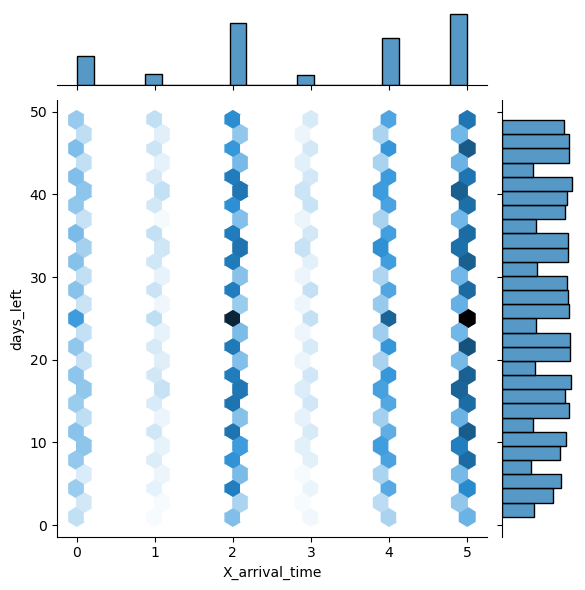

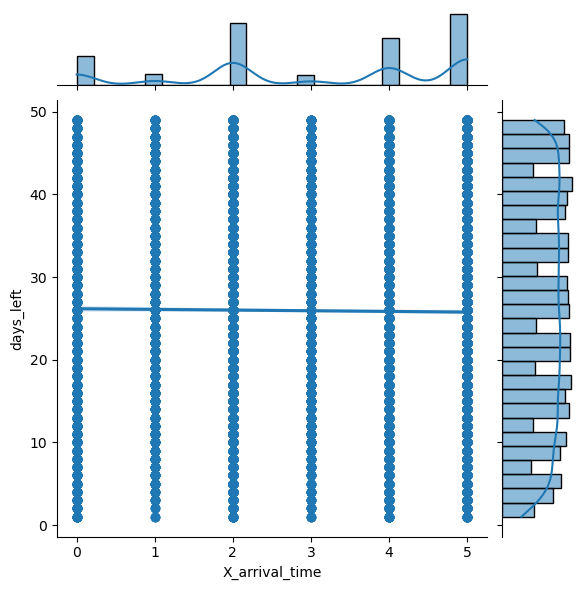

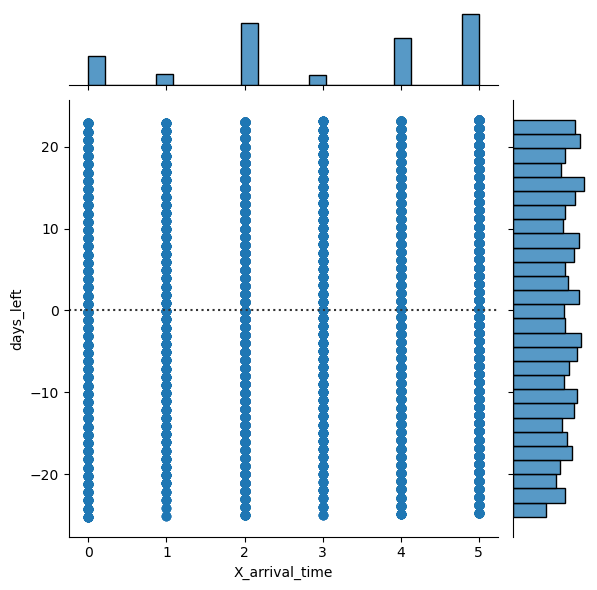

In [52]:
sns.jointplot(data=X_data, x='X_arrival_time', y='days_left', kind='scatter')
sns.jointplot(data=X_data, x='X_arrival_time', y='days_left', kind='kde')
sns.jointplot(data=X_data, x='X_arrival_time', y='days_left', kind='hist')
sns.jointplot(data=X_data, x='X_arrival_time', y='days_left', kind='hex')
sns.jointplot(data=X_data, x='X_arrival_time', y='days_left', kind='reg')
sns.jointplot(data=X_data, x='X_arrival_time', y='days_left', kind='resid')

In [53]:
mPiv = X_data.pivot_table(index='days_left', columns='X_arrival_time', values='price')
mPiv

X_arrival_time,0.0,1.0,2.0,3.0,4.0,5.0
days_left,,,,,,
1,19525.130435,23281.000000,22580.500000,12209.600000,23979.500000,27986.833333
2,29773.971429,18446.250000,28316.604938,14697.333333,34226.482759,34630.389474
3,33500.097561,12006.875000,34055.641026,12847.750000,31446.269841,27622.009804
4,21371.300000,25562.875000,28763.104762,20048.928571,24554.963855,23906.134021
5,21514.931818,26802.500000,31122.579832,24373.571429,27356.297297,20962.981982
6,26379.666667,12873.444444,29066.524194,19169.666667,23700.551282,24380.110236
7,22196.320000,20565.357143,27650.902174,22232.647059,28378.758621,24676.276423
8,18397.489796,17293.900000,26685.644231,18891.454545,29008.000000,24968.007874
9,26856.339286,19608.000000,25790.068966,19130.769231,30248.397436,23145.072727


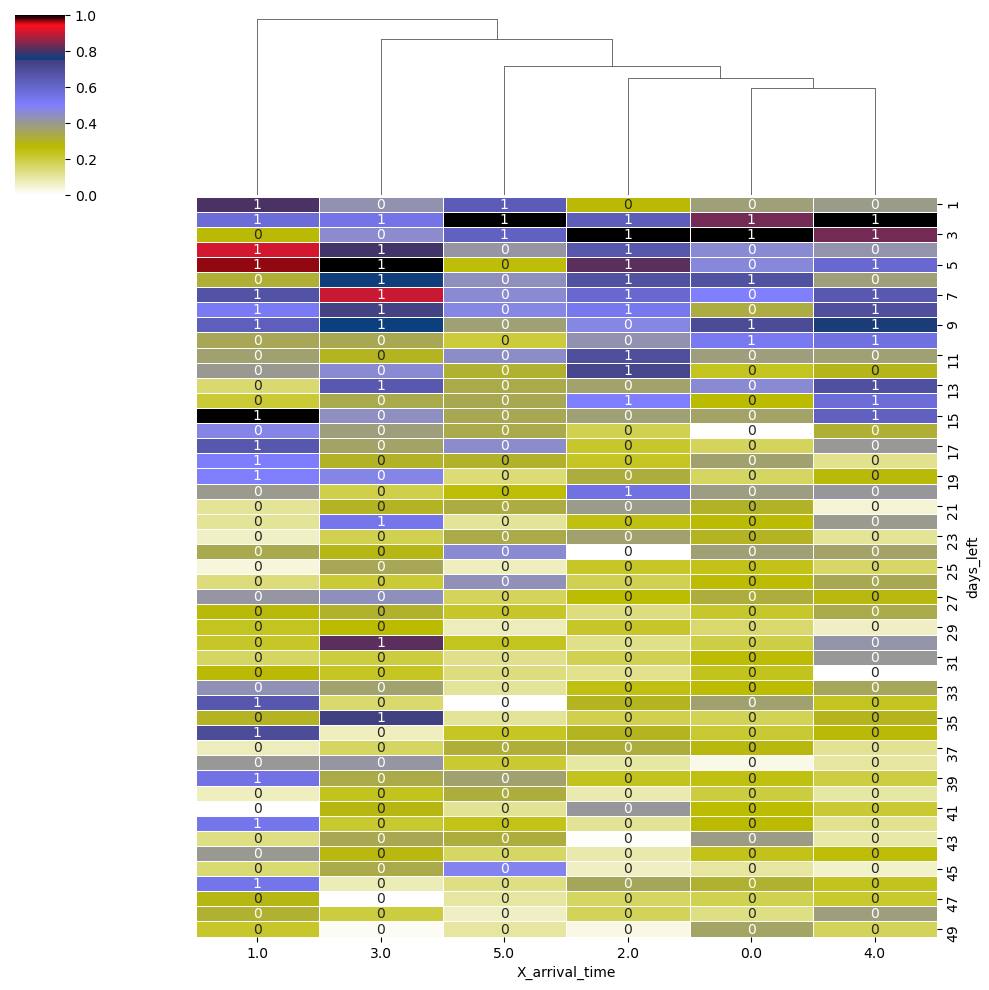

In [54]:
sns.clustermap(mPiv, row_cluster=False, annot=True, fmt='.0f', standard_scale=1, linewidth=.5, cmap='gist_stern_r')

# Finally data ready for ML

In [55]:
X_data.head(3)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,destination_city_number,X_arrival_time,departure_time_number,source_city_number,airline_number,flight_number
0,1,Vistara,UK-810,Bangalore,Early_Morning,1,Night,Mumbai,0,14.25,21,7212,5.0,5.0,1.0,0.0,5.0,810
1,2,SpiceJet,SG-5094,Hyderabad,Evening,0,Night,Kolkata,0,1.75,7,5292,4.0,5.0,2.0,3.0,4.0,5094
2,3,Vistara,UK-846,Bangalore,Morning,1,Evening,Delhi,1,9.58,5,60553,2.0,2.0,4.0,0.0,5.0,846


In [56]:
from sklearn.linear_model import ridge_regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
x_data = X_data[['id','stops','class','duration','days_left','destination_city_number','X_arrival_time','departure_time_number','source_city_number','airline_number','flight_number']]
y_data = X_data['price']

x_train,x_test,y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [93]:
# model-1

coef, intercept = ridge_regression(x_train, y_train, alpha=1.0, return_intercept=True)
print(f'ridge_regression: coef {coef}, \n percentage {intercept} \n')

ridge_regression: coef [ 4.37787029e-01  7.44324954e+01  3.25934787e+02  9.08154835e+02
  5.89469154e+01  2.04541248e+02  2.63239288e+02  2.17211893e+02
  1.97079954e+02  5.20441492e+02 -1.33339666e+00], 
 percentage 74.60399801929226 



/Users/azamatergashev/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [71]:
# model-2
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train,y_train)
print(f'percentage: {clf.score(x_test,y_test)}')
print(clf.coef_)

percentage: 0.9090231480342631
[-8.48407824e-03  6.20468898e+03  4.51508506e+04  8.80714034e+01
 -1.34413629e+02  1.72472555e+02  1.22135566e+02  3.39551114e+01
  1.13747421e+02  9.63078844e+02  2.37255802e-02]


In [90]:
# model-3
# clf = HistGradientBoostingClassifier()
# clf.fit(x_train, y_train)
# clf.score(x_train, y_train)

In [92]:
# model-4
regr = ElasticNet(random_state=0)
regr.fit(x_train, y_train)
print(regr.coef_)
print(regr.intercept_)

[-1.67385297e-02  5.68923593e+02  1.25962196e+04  4.91382543e+02
 -1.58911962e+02  2.27640058e+02  2.74741466e+02  2.08496865e+02
  1.63774144e+02  1.98692317e+03 -1.41959047e+00]
8218.312193675216


In [99]:
# model-5
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.347375

In [107]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

In [109]:
# model-6
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)
reg.score(x_train,y_train)

0.9592770179807326

In [110]:
# model-6
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
regr.score(x_train, y_train)

0.9256070054091582

In [111]:
#model-7
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)
neigh.score(x_train, y_train)

0.5936628175871006

In [112]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_train, y_train)
regr.score(x_train, y_train)

0.9366306340189071

# recommend system

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_data['airline'])
vectorizer.get_feature_names_out()

array(['air_india', 'airasia', 'go_first', 'indigo', 'spicejet',
       'vistara'], dtype=object)